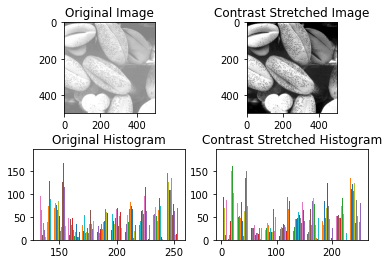

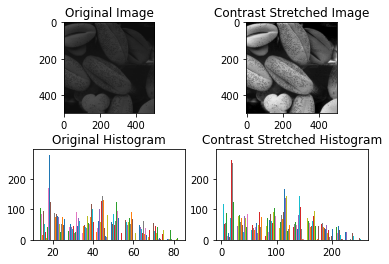

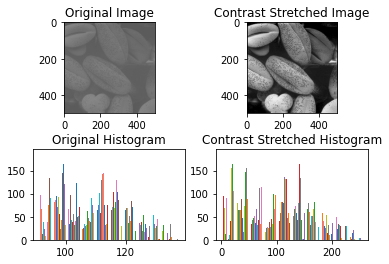

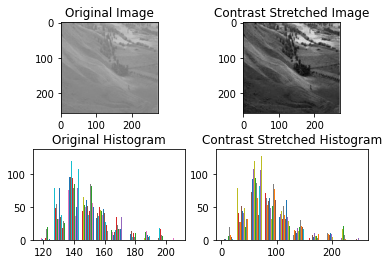

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretch(filename):
  img = Image.open(filename)
  img_grayscale = img.convert('L')
  img_array = np.array(img_grayscale)
  img_size = img_array.shape
  new_img_array = np.zeros(img_size)
  r_min = img_array.min()
  r_max = img_array.max()
  s_min = 0
  s_max = 255

  for i in range(img_size[0]):
    for j in range(img_size[1]):
      pixel = img_array[i,j]
      val = ((s_max - s_min)/(r_max - r_min)) * (pixel - r_min) + s_min  #Applying formula to each pixel
      new_img_array[i,j] = val #Storing new pixel value in new array


  #Plotting images and their respective histograms
  rgb_original = Image.new("RGBA", img.size)
  rgb_original.paste(img)
  grayscale = Image.new("RGBA", img.size)
  grayscale.paste(Image.fromarray(new_img_array))
  
  fig, axes = plt.subplots(nrows=2, ncols=2)

  axes[0, 0].imshow(np.array(rgb_original))
  axes[0, 0].set_title("Original Image")

  axes[0, 1].imshow(np.array(grayscale))
  axes[0, 1].set_title("Contrast Stretched Image")

  axes[1, 0].hist(img_array)
  axes[1, 0].set_title("Original Histogram")

  axes[1, 1].hist(new_img_array)
  axes[1, 1].set_title("Contrast Stretched Histogram")
  plt.subplots_adjust(hspace = 0.4)
  plt.show()
  

contrast_stretch("bright.tif")
contrast_stretch("dark.tif")
contrast_stretch("lowcon.tif")
contrast_stretch("wiki.jpg")

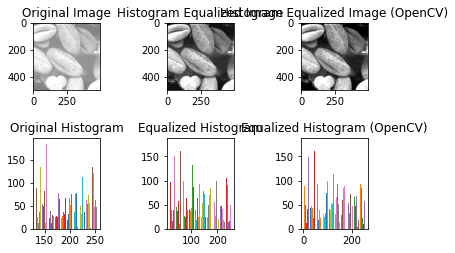

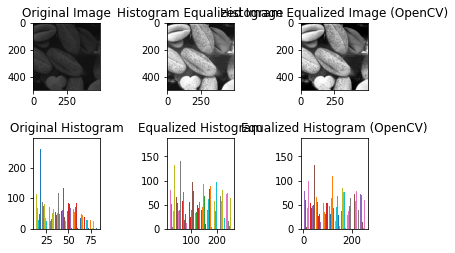

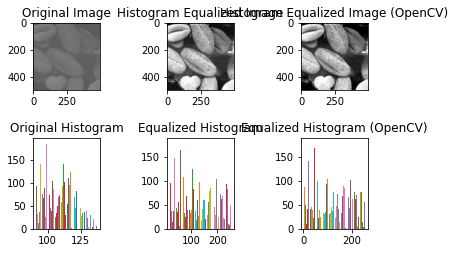

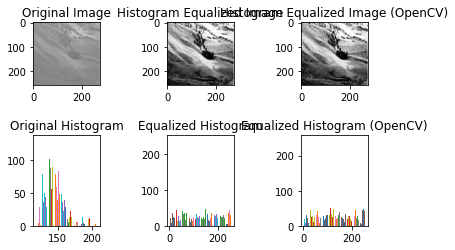

In [57]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from math import floor
import cv2

def histogram_equalization(filename):
  img = Image.open(filename)
  img_grayscale = img.convert('L')
  img_array = np.array(img_grayscale)
  img_size = img_array.shape

  total_pixels = img_size[0] * img_size[1]
  counts = np.zeros(256)
  probabilities = np.zeros(256)
  cumulative_probs = np.zeros(256)
  transformation = np.zeros(256)

  new_img_array = np.zeros(img_size)

  #Calculating frequencies of each pixel value
  for i in range(img_size[0]):
    for j in range(img_size[1]):
      counts[img_array[i, j]] = counts[img_array[i, j]] + 1
  
  #Calculating probability of each pixel value
  for i in range(256):
    probabilities[i] = counts[i] / total_pixels
  
  #Calculating cumulative probability of each pixel value
  for i in range(256):
    if (i == 0):
      cumulative_probs[i] = probabilities[i]
    else:
      cumulative_probs[i] = cumulative_probs[i - 1] + probabilities[i]

  #Calculating transformed pixel value
  for i in range(256):
    transformation[i] = floor(cumulative_probs[i] * 255)

  #Applying transformation to original image
  for i in range(img_size[0]):
    for j in range(img_size[1]):
      new_img_array[i, j] = transformation[img_array[i, j]]

  #Performing equalization using OpenCV
  img_cv = cv2.imread(filename)
  img_yuv = cv2.cvtColor(img_cv,cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

  #Plotting results
  rgb_original = Image.new("RGBA", img.size)
  rgb_original.paste(img)
  grayscale = Image.new("RGBA", img.size)
  grayscale.paste(Image.fromarray(new_img_array))
  
  openCV = Image.new("RGBA", img.size)
  openCV.paste(Image.fromarray(hist_eq))
  openCV = openCV.convert("L")
  openCV_array = np.array(openCV)

  
  fig, axes = plt.subplots(nrows=2, ncols=3)

  axes[0, 0].imshow(np.array(rgb_original))
  axes[0, 0].set_title("Original Image")

  axes[0, 1].imshow(np.array(grayscale))
  axes[0, 1].set_title("Histogram Equalized Image")

  axes[0, 2].imshow(np.array(hist_eq))
  axes[0, 2].set_title("Histogram Equalized Image (OpenCV)")

  axes[1, 0].hist(img_array)
  axes[1, 0].set_title("Original Histogram")

  axes[1, 1].hist(new_img_array)
  axes[1, 1].set_title("Equalized Histogram")

  axes[1, 2].hist(openCV_array)
  axes[1, 2].set_title("Equalized Histogram (OpenCV)")

  plt.subplots_adjust(hspace = 0.4, wspace = 1)
  plt.show()

histogram_equalization("bright.tif")
histogram_equalization("dark.tif")
histogram_equalization("lowcon.tif")
histogram_equalization("wiki.jpg")